# Assignment 4
# Submitted by: Arshad Ali(214102301)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

## 1

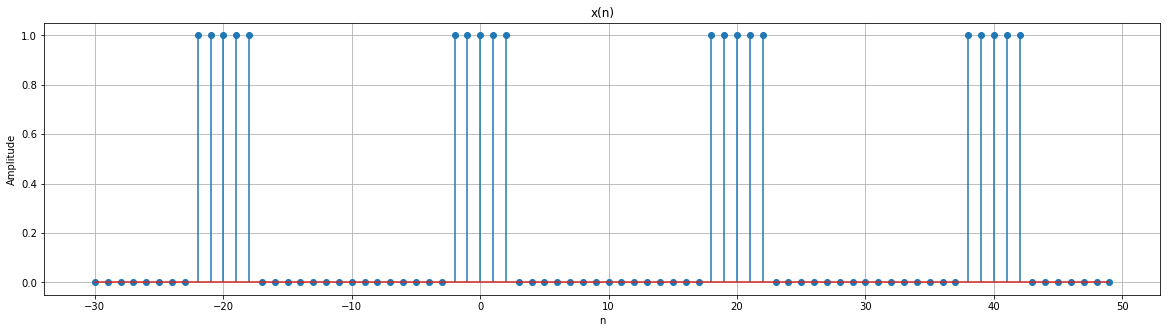

In [2]:
def x1(n):
    t = n%20
    if(t in [18,19,0,1,2]):
        return 1
    else:
        return 0
n = np.arange(-30,50)
x = [x1(i) for i in n]
plt.figure(figsize=(20,5))
plt.stem(n,x)
plt.title("x(n)")
plt.xlabel('n')
plt.ylabel('Amplitude')
plt.grid()
    

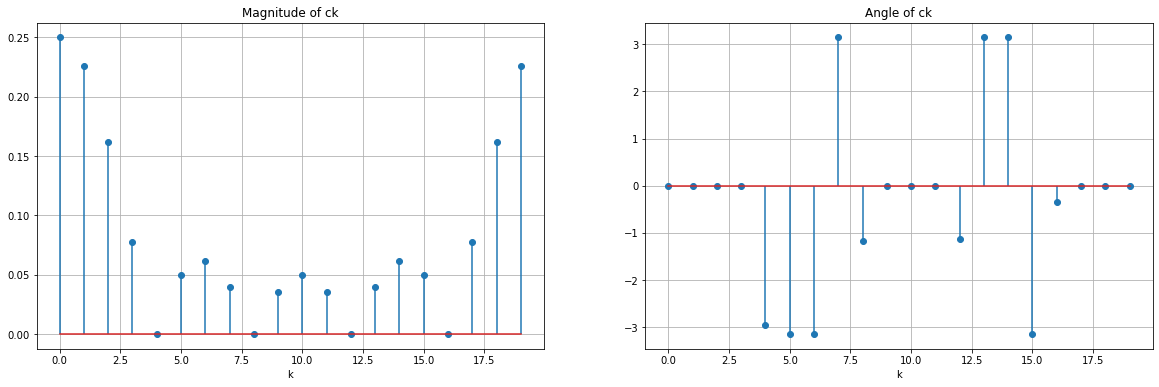

In [4]:
def dtfs(x,N):
    ck = np.zeros(N,dtype = 'complex_')
    for k in range(N):
        for n in range(N):
            ck[k] += (x(n)*np.exp(-2j*np.pi*k*n/N))/N
    return ck

ck = dtfs(x1,20)
n = np.arange(len(ck))

fig, axes = plt.subplots(1, 2, figsize=(20, 6))

axes[0].stem(n,np.absolute(ck))
axes[0].set_title("Magnitude of ck")
axes[0].set_xlabel("k")
axes[0].grid()

axes[1].stem(n,np.angle(ck))
axes[1].set_title("Angle of ck")
axes[1].set_xlabel("k")
axes[1].grid()

## 2

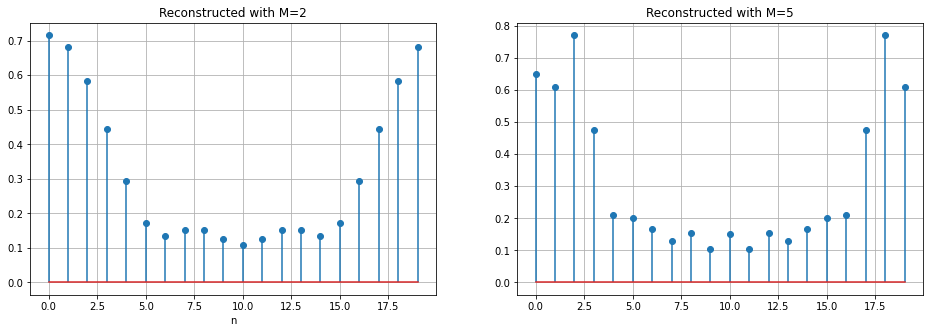

In [5]:
def reconstruct(ck,M):
    N = len(ck)
    xn = []
    for n in range(N):
        x = 0
        for k in range(2*M+1):
            x+=(ck[k]*np.exp(2j*np.pi*k*n/N))
        xn.append(x)
    return xn

fig,axes = plt.subplots(1,2,figsize=(16,5))
n = np.arange(20)

xn1 = reconstruct(ck,2)
xn2 = reconstruct(ck,5)
axes[0].stem(n,np.absolute(xn1))
axes[0].set_title("Reconstructed with M=2")
axes[0].set_xlabel("n")
axes[0].grid()

axes[1].stem(n,np.absolute(xn2))
axes[1].set_title("Reconstructed with M=5")
axes[0].set_xlabel("n")
axes[1].grid()

As we are increasing the number of coefficients reconstructed signal is getting closer to the original signal.

## 3

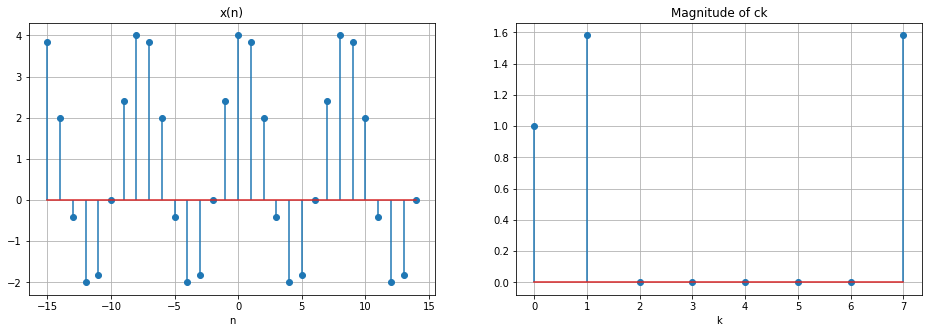

In [6]:
def xn(n,N=8):
    return 1 + np.sin(2*np.pi*n/N) + 3*np.cos(2*np.pi*n/N)
n = np.arange(-15,15)
x = [xn(i,8) for i in n]


def dtfs(x,N):
    ck = np.zeros(N,dtype = 'complex_')
    for k in range(N):
        for n in range(N):
            ck[k] += (x(n)*np.exp(-2j*np.pi*k*n/N))/N
    return ck

ck = dtfs(xn,8)
n_ck = np.arange(len(ck))

fig,axes = plt.subplots(1,2,figsize=(16,5))

axes[0].stem(n,x)
axes[0].set_title("x(n)")
axes[0].set_xlabel("n")
axes[0].grid()
axes[1].stem(n_ck,np.absolute(ck))
axes[1].set_title("Magnitude of ck")
axes[1].set_xlabel("k")
axes[1].grid()


## 3(b)

In [6]:
def square_sum_ck(ck):
    sum = 0
    for i in ck:
        sum += np.absolute(i)**2
    return sum

def square_sum_xn(xn,N):
    sum = 0
    for i in range(N):
        sum += xn(i,N)**2
    return sum/N

LHS = square_sum_xn(xn,8)
RHS = square_sum_ck(ck)

In [7]:
LHS

6.0

In [8]:
RHS

6.000000000000002

## 4

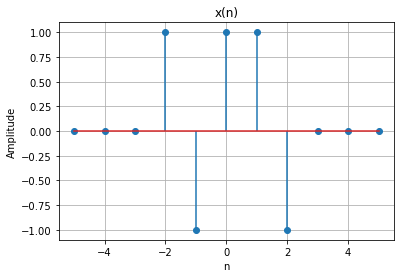

In [7]:
def DTFT(x,w):
    n = len(x)
    dtft = 0
    for i in range(n):
        dtft+=x[i]*(np.exp(-1j*w*i))
    return dtft

n = np.arange(-5,6)
xn = [0,0,0,1,-1,1,1,-1,0,0,0]
plt.stem(n,xn)
plt.xlabel("n")
plt.ylabel("Amplitude")
plt.title("x(n)")
plt.grid()

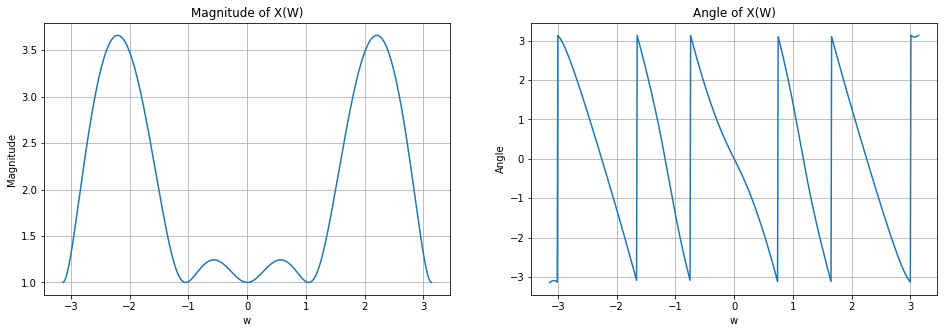

In [8]:
fig,axes = plt.subplots(1,2,figsize=(16,5))

w = np.arange(-np.pi,np.pi,0.01)
X_w = DTFT(xn,w)
axes[0].plot(w,np.absolute(X_w))
axes[0].set_xlabel("w")
axes[0].set_ylabel("Magnitude")
axes[0].set_title("Magnitude of X(W)")
axes[0].grid()
axes[1].plot(w,np.angle(X_w))
axes[1].set_xlabel("w")
axes[1].set_ylabel("Angle")
axes[1].set_title("Angle of X(W)")
axes[1].grid()

## 5

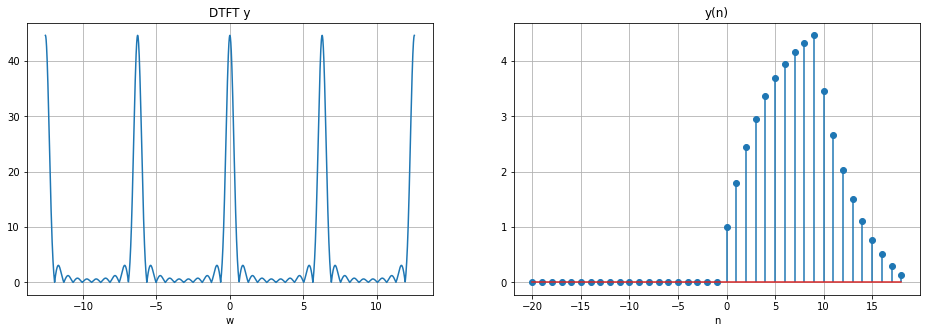

In [10]:
def step(n):
    if n>=0:
        return 1
    else:
        return 0

def xn(n):
    return (np.power(0.8,n))*(step(n))
n = np.arange(-10,10)
xn = [xn(i) for i in n]
hn = [step(i) for i in n]
yn = np.convolve(xn,hn)

fig,axes = plt.subplots(1,2,figsize=(16,5))
n = np.arange(-20,19)
omega = np.arange(-4*np.pi,4*np.pi,0.01)
dtft_y = DTFT(yn,omega)
axes[0].plot(omega,np.absolute(dtft_y))
axes[0].set_title("DTFT y")
axes[0].set_xlabel("w")
axes[0].grid()

axes[1].stem(n,yn)
axes[1].set_title("y(n)")
axes[1].set_xlabel("n")
axes[1].grid()

## 6

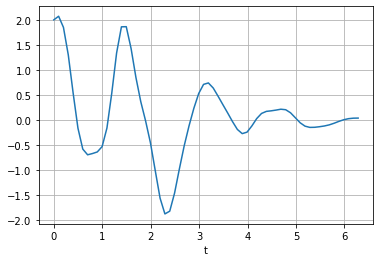

In [11]:
def func(t):
    
    f1 = np.sin(2*t)
    f2 = 2*np.cos(4*t)
    f3 = 0.4*np.sin(t)*np.sin(10*t)
    f4 = np.exp(-(t**2)/10)
    f = f4*(f1 + f2 + f3)
    return f

t = np.linspace(0,2*np.pi,64)
f_t = [func(i) for i in t]
plt.plot(t,f_t)
plt.xlabel("t")
plt.grid()

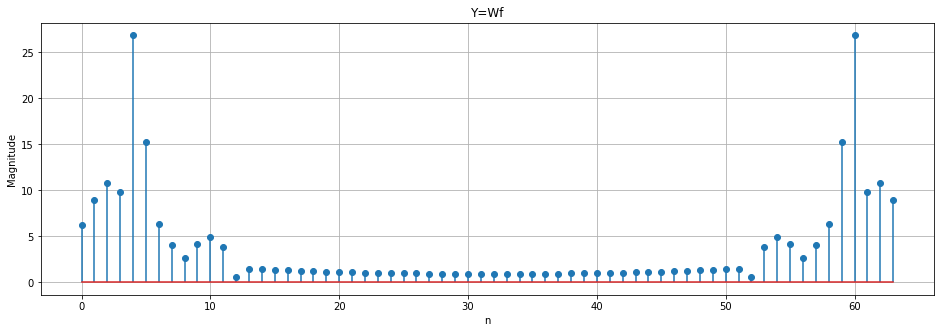

In [12]:
N = 64
W = np.zeros((N,N),dtype=complex)

for n in range(N):
    for k in range(N):
        W[n][k] = np.exp(-2j*np.pi*n*k/N)
        
plt.subplots(figsize=(16,5))
n = np.arange(0,N)
F_t = np.reshape(f_t,(64,1))
Y = np.dot(W,F_t)
plt.stem(n,np.absolute(Y))
plt.xlabel('n')
plt.ylabel('Magnitude')
plt.title('Y=Wf')
plt.grid()

## 7

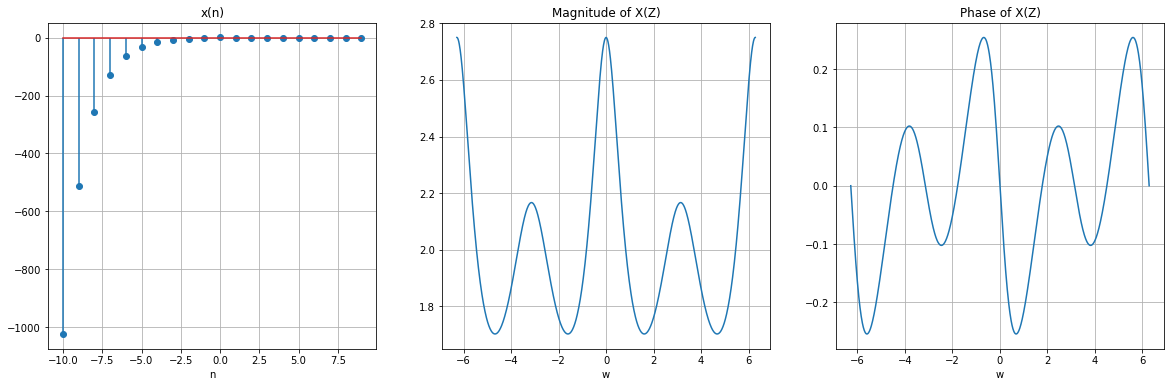

In [13]:
def step(n):
    if(n>=0):
        return 1
    else:
        return 0
    
n = np.arange(-10,10)
x = [((-1/3)**i)*step(i) - ((1/2)**i)*step(-i-1) for i in n]

def X_z(w):
    z = np.exp(1j*w)
    xz = (z/(z+1/3)) + (z/(z-0.5))
    return xz
w = np.linspace(-2*np.pi,2*np.pi,1000)
z_transform = [X_z(i) for i in w]

fig,axes = plt.subplots(1,3,figsize=(20,6))

axes[0].stem(n,x)
axes[0].grid()
axes[0].set_title("x(n)")
axes[0].set_xlabel("n")
axes[1].plot(w,np.absolute(z_transform))
axes[1].set_title("Magnitude of X(Z)")
axes[1].set_xlabel("w")
axes[1].grid()
axes[2].plot(w,np.angle(z_transform))
axes[2].set_title("Phase of X(Z)")
axes[2].set_xlabel("w")
axes[2].grid()

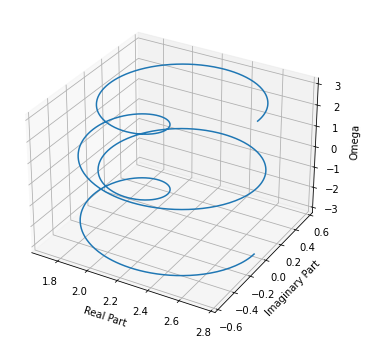

In [17]:
x = np.real(z_transform)
y = np.imag(z_transform)
w = np.linspace(-np.pi,np.pi,1000)

fig = plt.figure(figsize=(18,6))
ax = plt.axes(projection ='3d')
ax.plot3D(x,y,w)
ax.set_xlabel('Real Part')
ax.set_ylabel('Imaginary Part')
ax.set_zlabel('Omega')
plt.show()

##  7(b)

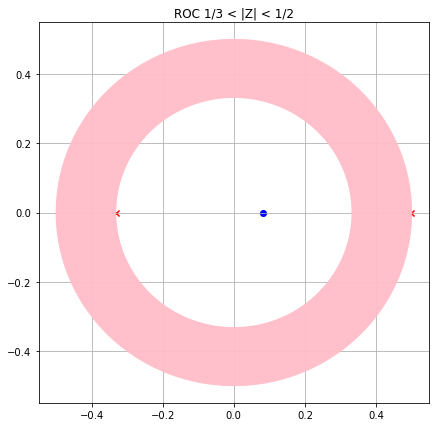

In [16]:
omega = np.arange(0,2*np.pi,0.01)
r = np.linspace(1/3,1/2,1000)

# ROC 1/3 to 1/2
plt.figure(figsize=(7,7))

zeros = [1/12]
poles = [1/2, -1/3]


    
for z in zeros:
    plt.scatter(np.real(z),np.imag(z),marker='o',color='b')
for p in poles:
    plt.scatter(np.real(p),np.imag(p),marker='x',color='r')


for i in r:
    x = i*(np.cos(omega)+ 1j*np.sin(omega))
    x_r = np.real(x)
    x_i = np.imag(x)
    plt.plot(x_r,x_i,alpha=0.2,color='pink')

plt.grid()
plt.title("ROC 1/3 < |Z| < 1/2")
plt.show()

## 8

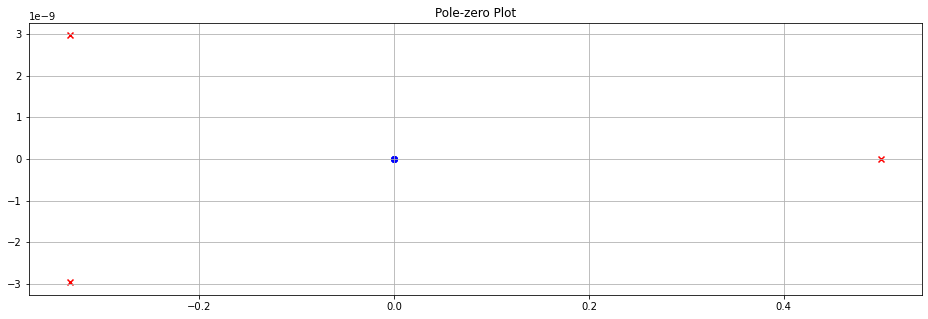

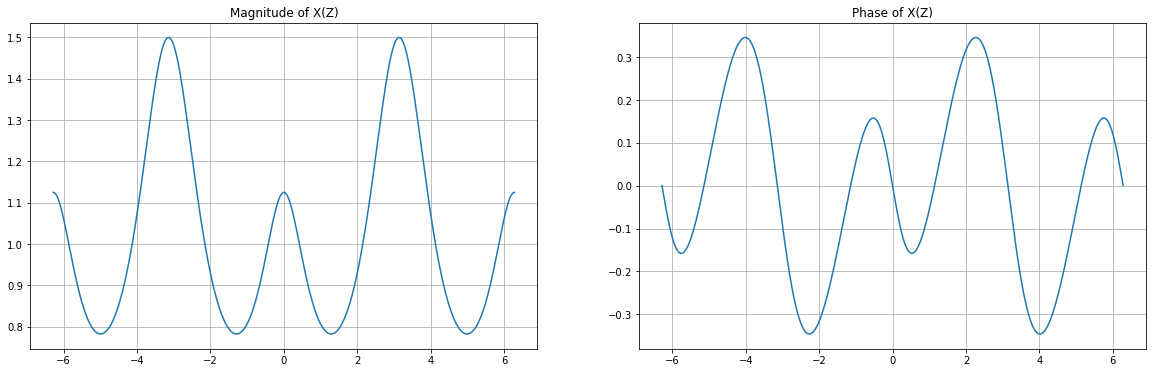

In [57]:
def X_z(w):
    z = np.exp(1j*w)
    num = 18*(z**3)
    den = 18*(z**3) + 3*(z**2) - 4*z - 1
    return num/den

w = np.linspace(-2*np.pi,2*np.pi,1000)
z_transform = [X_z(i) for i in w]

num = [18,0,0,0]
den = [18,3,-4,-1]
zeros,poles,k=signal.tf2zpk(num, den)


plt.figure(figsize=(16,5))
    
for z in zeros:
    plt.scatter(np.real(z),np.imag(z),marker='o',color='b')
for p in poles:
    plt.scatter(np.real(p),np.imag(p),marker='x',color='r')

plt.grid()
plt.title("Pole-zero Plot")



fig,axes = plt.subplots(1,2,figsize=(20,6))

axes[0].plot(w,np.absolute(z_transform))
axes[0].set_title("Magnitude of X(Z)")
axes[0].grid()
axes[1].plot(w,np.angle(z_transform))
axes[1].set_title("Phase of X(Z)")
axes[1].grid()

## 8(b)

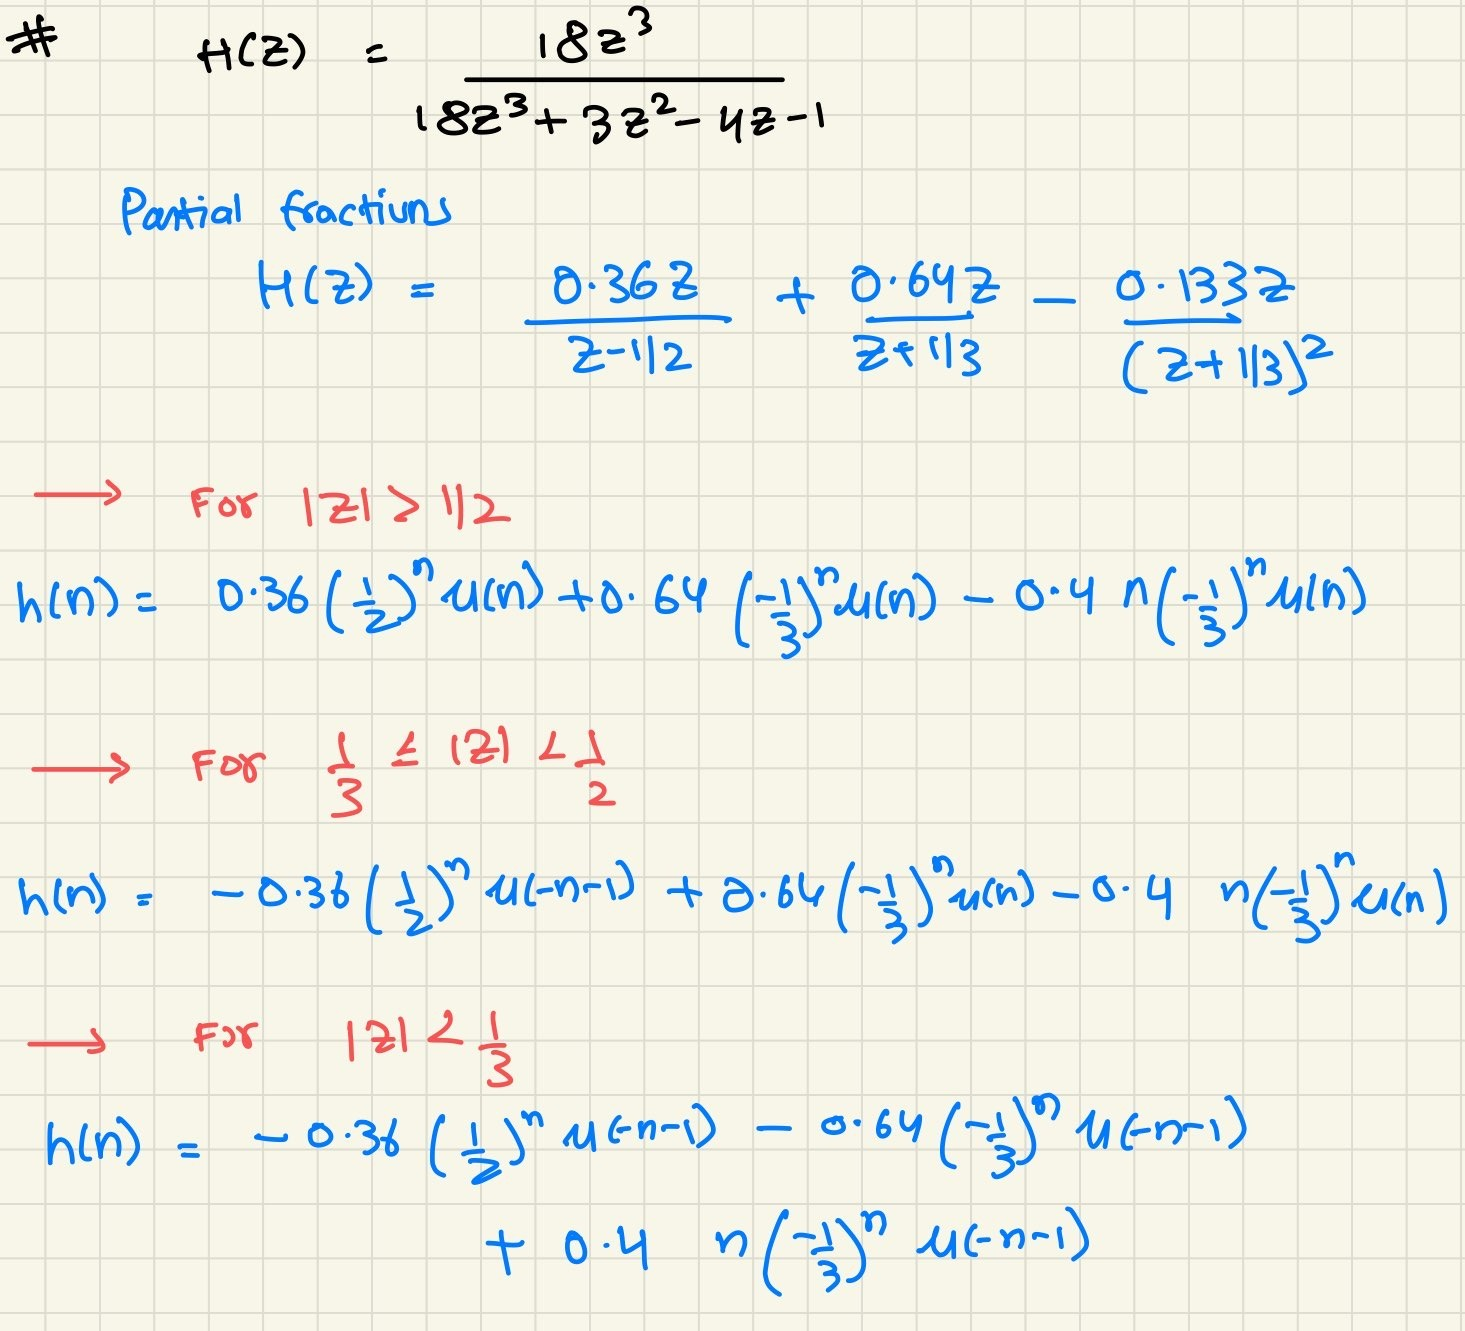

## 9

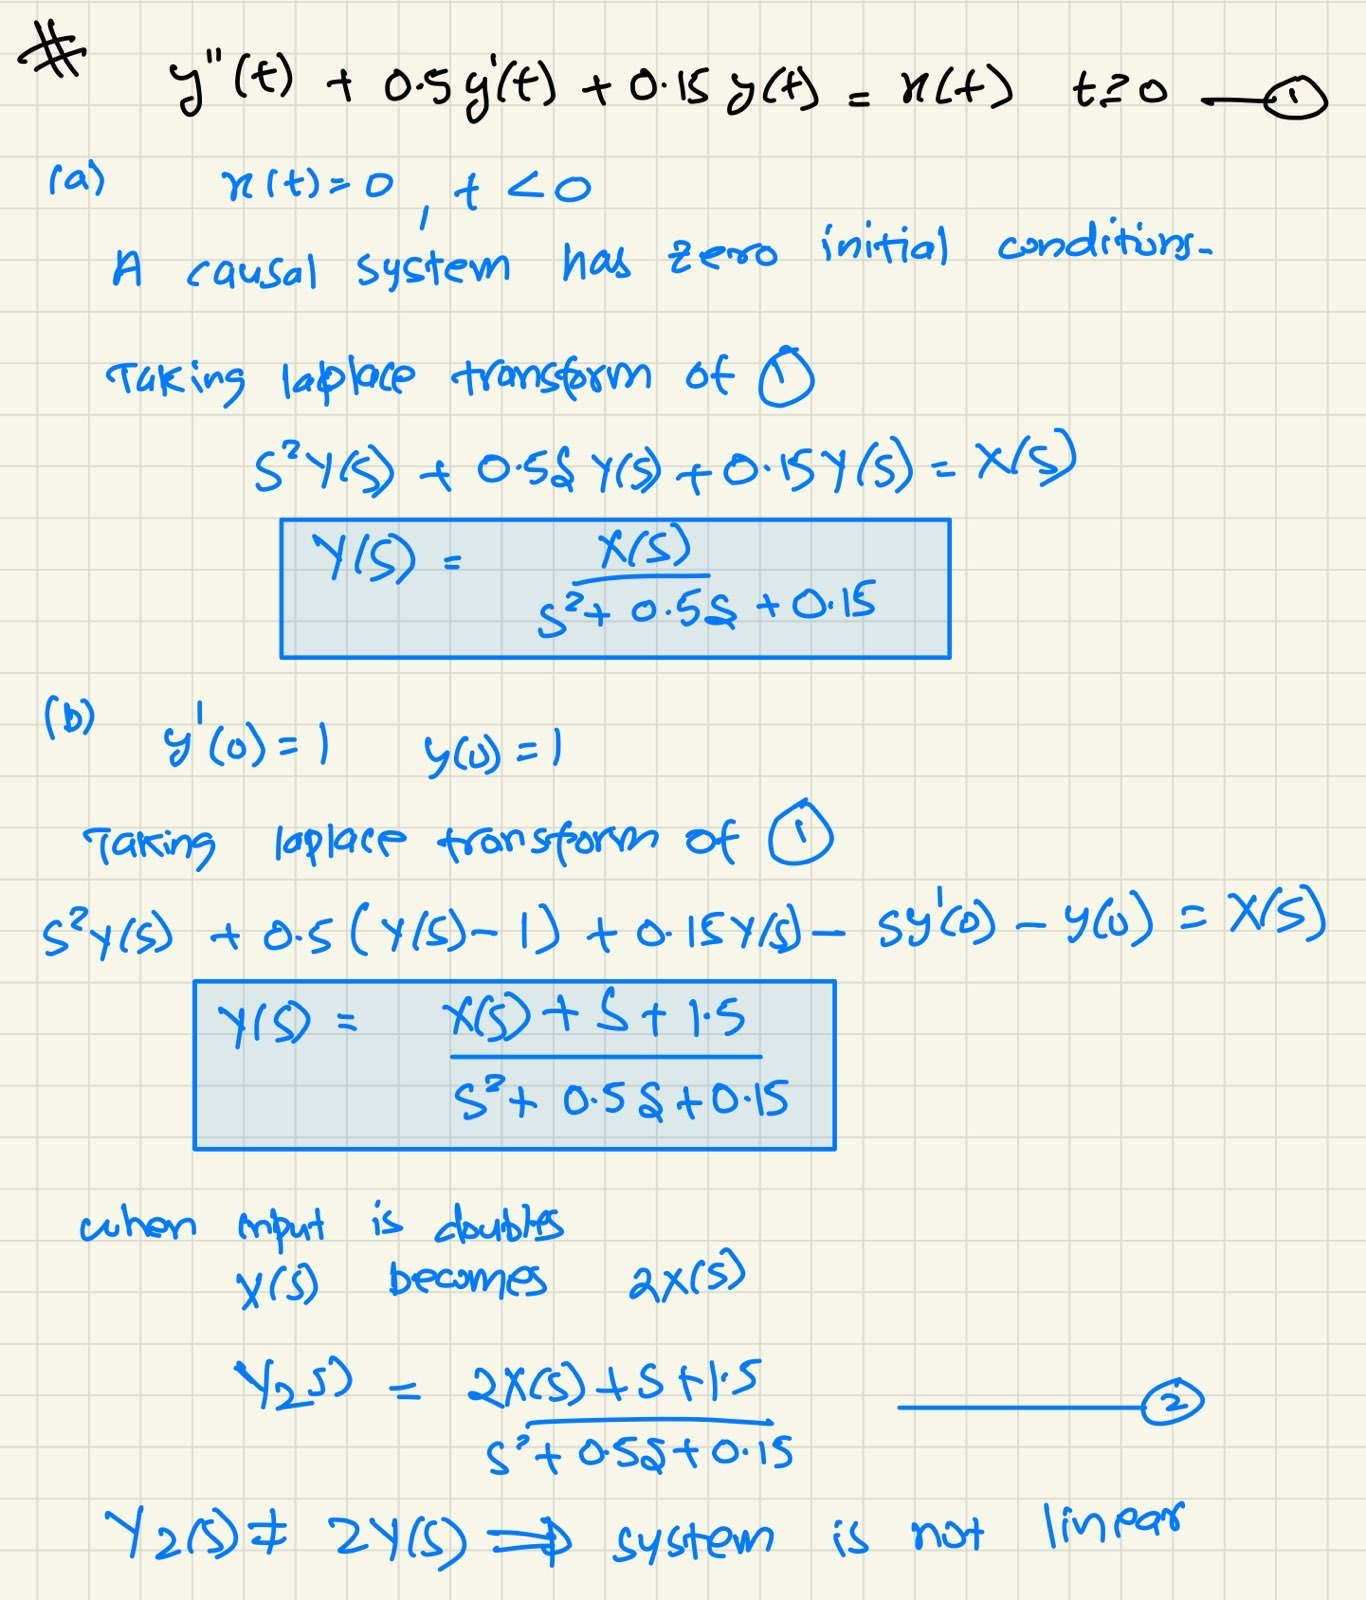


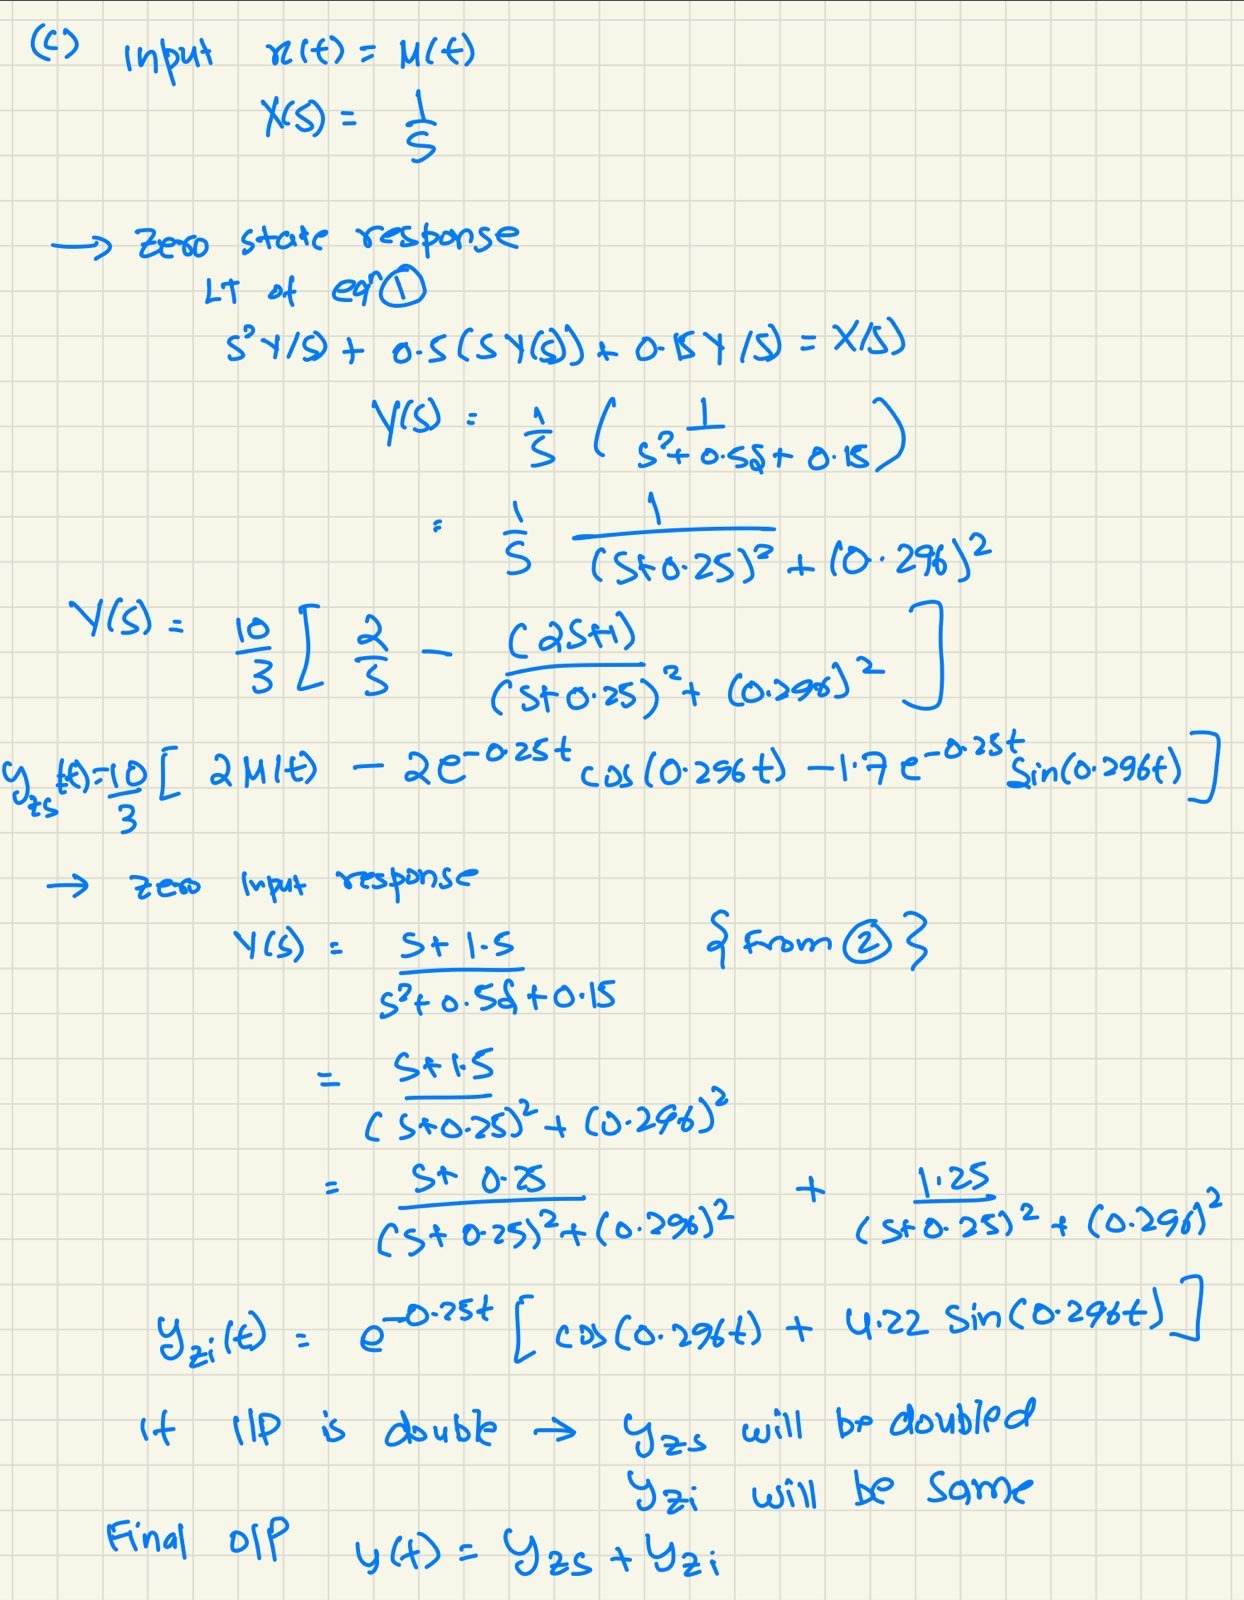

## 10

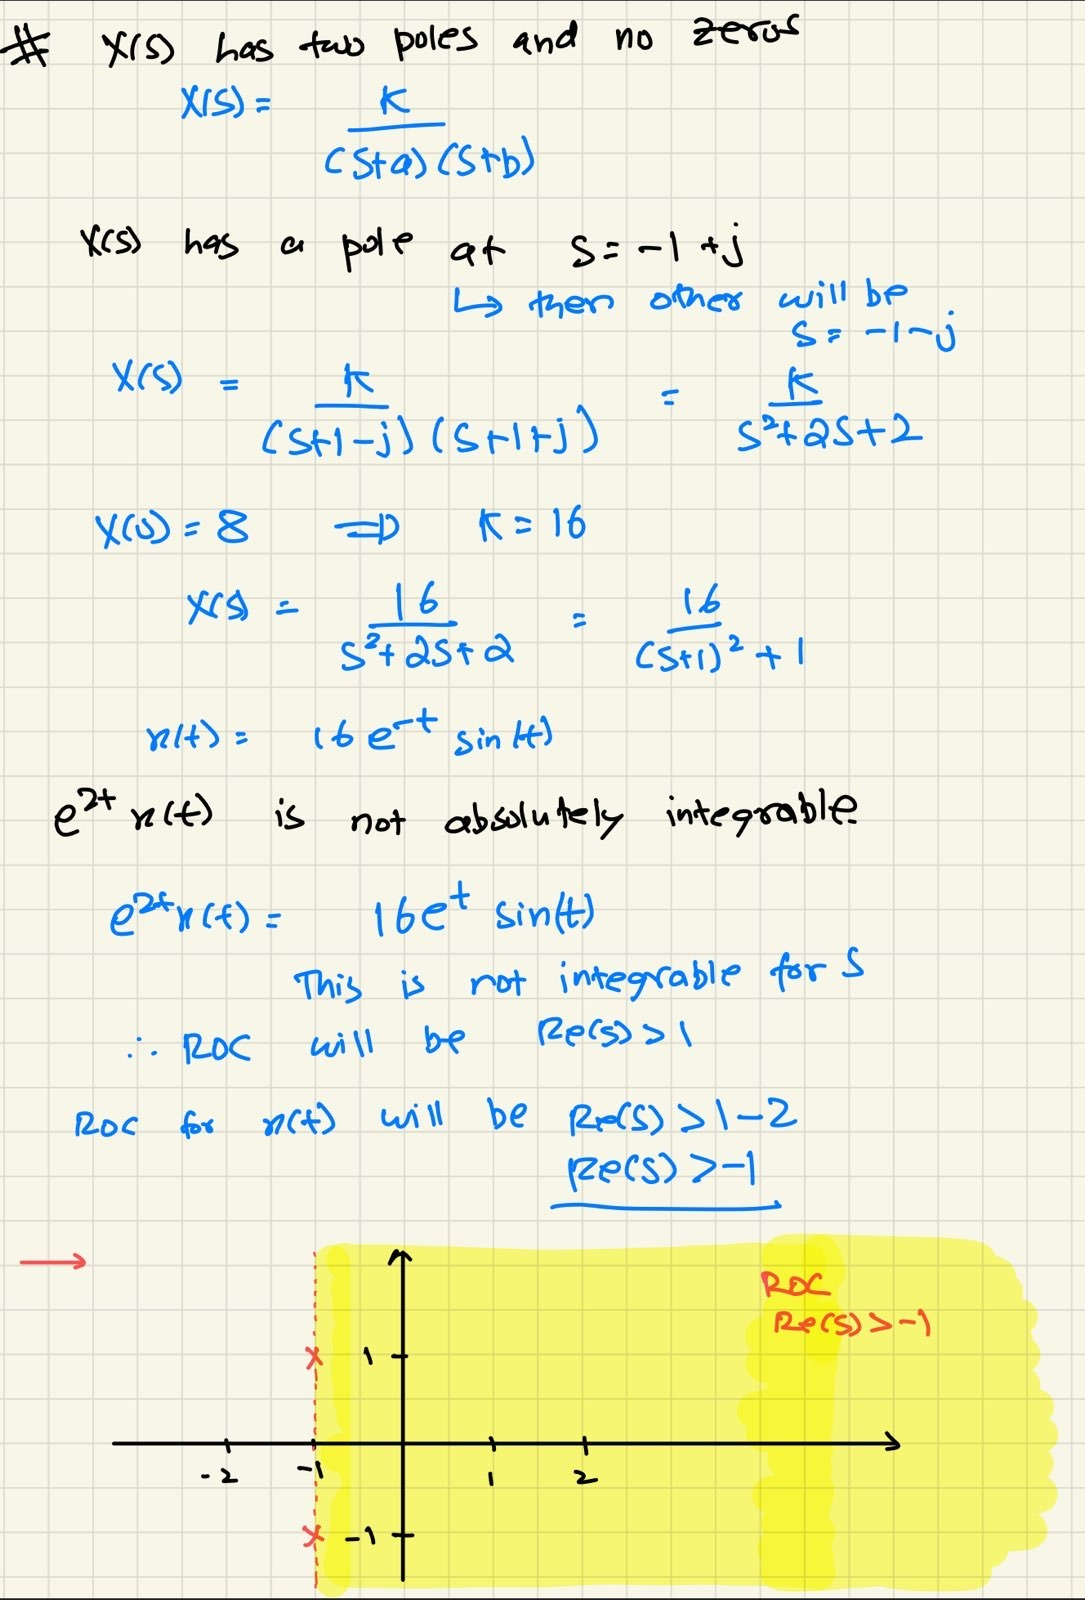